# One step further: Mastering Atari games with RL

<br>
In this notebook we introduce the most complex environments that we are going to solve. These are classic video games of the atari 2600 console, in which the states consist of the images that the console projects on the screen and the actions are represented by the buttons on the controller.

Working with states represented by pixels will force us to use a new class of function approximators called convolutional neural networks.

<br><br><br>
<div style="text-align:center">
    <b>This notebook belongs to lesson 9 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>


<br><br>

<table>
    <tr style="background-color: transparent">
            <td>
        <a target="_parent" href="https://colab.research.google.com/github/escape-velocity-labs/evrl/blob/main/notebooks/Atari_Introduction.ipynb" style="float: center">
            <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
        </a>  
    </td>
    </tr>
    <tr>
        <th style="text-align: center">Open this notebook in Google colab</th>
    </tr>
</table>

<br>

In [1]:
import gym
import torch
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from evrl.common.envs import make_atari
%matplotlib inline

In [2]:
def prepare_frames(frames: torch.Tensor) -> torch.Tensor:
    frame1, frame2, frame3, frame4 = frames.squeeze()
    merged_frames = torch.cat([frame1, frame2, frame3, frame4], dim=1)
    return merged_frames

In [11]:
def test_env(env: gym.Env, render: bool = True) -> None:
    state = env.reset()
    done = False
    plt.figure(figsize=(16,8))
    if render:
        img = plt.imshow(env.render(mode='rgb_array'))
    else:
        img = plt.imshow(prepare_frames(state), cmap='Greys_r')
     
    while not done:
        action = torch.tensor(env.action_space.sample())
        state, _, done, _ = env.step(action)
        if render:
            img.set_data(env.render(mode='rgb_array'))
        else:
            img.set_data(prepare_frames(state))
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)

## Breakout: bounce the ball to destroy the ceiling.

###### Create the environment

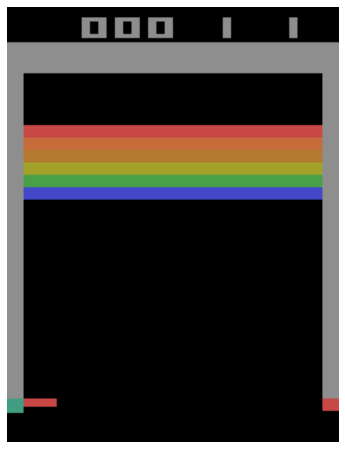

In [4]:
env = make_atari('BreakoutNoFrameskip-v4')
test_env(env)
env.close()

###### The state

The states of this task are 84x84 pixel grayscale frames. At the bottom you can see the paddle that the player controls and at the top the wall that it has to knock down by bouncing the ball. Each state consists of the current frame and also the last three, so that the player can see in the direction that the ball moves and the speed it moves.

The shape of the array containing the observation is:

1 x 4 x 84 x 84 (1 batch of 4 frames, each of 84 height and 84 width).

In [5]:
state = env.reset()
for _ in range(10):
    action = torch.tensor(env.action_space.sample())
    state, _, _, _ = env.step(action)

dims = ("Batch", "Frames", "Height", "Width")
pd.DataFrame(zip(dims, state.shape), columns=['Dimension', 'Size'])


,Dimension,Size
0,Batch,1
1,Frames,4
2,Height,84
3,Width,84


###### What the agent sees:

The image we get when we render a frame is different from the input that the agent gets. Since colors are not important to solve the task and the raw image is too big, the agent receives a smaller, grayscale version of it.

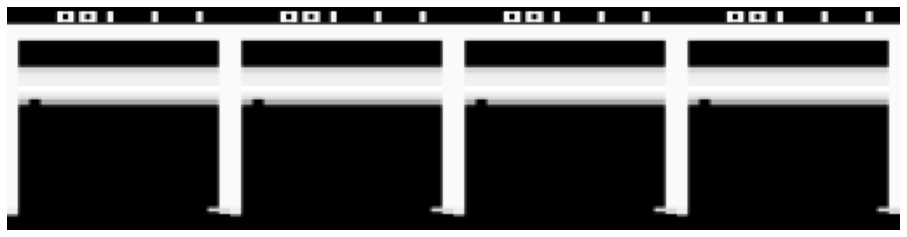

In [12]:
test_env(env, render=False)

###### The actions available

The agent can perform four actions:

In [13]:
meanings = env.unwrapped.get_action_meanings()
explanations = ("Do nothing", "Start the game", "Move right", "Move left")
pd.DataFrame(zip(meanings, explanations), columns=['Name', 'Explanation'])

,Name,Explanation
0,NOOP,Do nothing
1,FIRE,Start the game
2,RIGHT,Move right
3,LEFT,Move left


## Space Invaders: shoot down alien spaceships while dodging their fire.

###### Create the environment

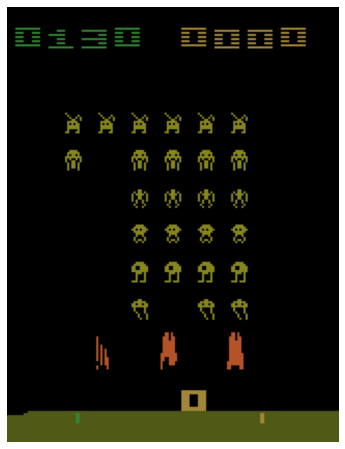

In [14]:
env = make_atari('SpaceInvadersNoFrameskip-v0')
test_env(env)
env.close()

###### The state

The states of this task are 84x84 pixel grayscale frames. Below you can see the player's spaceship and above it, the enemy ships. The goal of the game is to shoot and destroy the enemy ships before they destroy ours.

The shape of the array containing the observation is:

1 x 4 x 84 x 84 (1 batch of 4 frames, each of 84 height and 84 width).

In [15]:
state = env.reset()
for _ in range(10):
    action = torch.tensor(env.action_space.sample())
    state, _, _, _ = env.step(action)

dims = ("Batch", "Frames", "Height", "Width")
pd.DataFrame(zip(dims, state.shape), columns=['Dimension', 'Size'])


,Dimension,Size
0,Batch,1
1,Frames,4
2,Height,84
3,Width,84


###### What the agent sees:

The image we get when we render a frame is different from the input that the agent gets. Since colors are not important to solve the task and the raw image is too big, the agent receives a smaller, grayscale version of it.

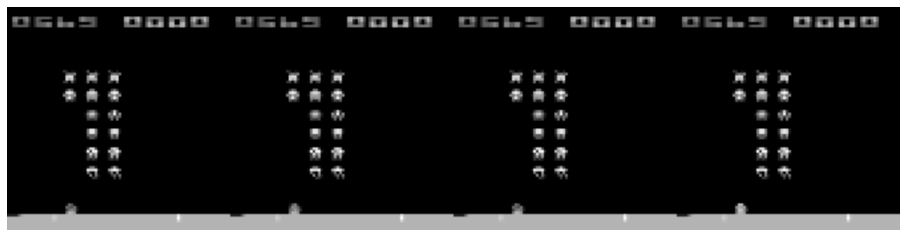

In [16]:
test_env(env, render=False)

###### The actions available

The agent can perform four actions:

In [17]:
meanings = env.unwrapped.get_action_meanings()
explanations = ("Do nothing", "Start the game", "Move right", "Move left")
pd.DataFrame(zip(meanings, explanations), columns=['Name', 'Explanation'])

,Name,Explanation
0,NOOP,Do nothing
1,FIRE,Start the game
2,RIGHT,Move right
3,LEFT,Move left


## Pong: beat the opponent at table tennis.

###### Create the environment

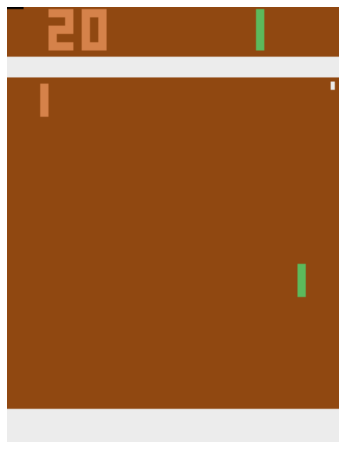

In [18]:
env = make_atari('PongNoFrameskip-v4')
test_env(env)
env.close()

###### The state

On the right you can see the player's paddle and on the left the computer's paddle. To win a point you have to get the ball to the opponent's side without it being able to hit it with the paddle.

The shape of the array containing the observation is:

1 x 4 x 84 x 84 (1 batch of 4 frames, each of 84 height and 84 width).

In [19]:
state = env.reset()
for _ in range(100):
    action = torch.tensor(env.action_space.sample())
    state, _, _, _ = env.step(action)

dims = ("Batch", "Frames", "Height", "Width")
pd.DataFrame(zip(dims, state.shape), columns=['Dimension', 'Size'])

,Dimension,Size
0,Batch,1
1,Frames,4
2,Height,84
3,Width,84


###### What the agent sees:

The image we get when we render a frame is different from the input that the agent gets. Since colors are not important to solve the task and the raw image is too big, the agent receives a smaller, grayscale version of it.

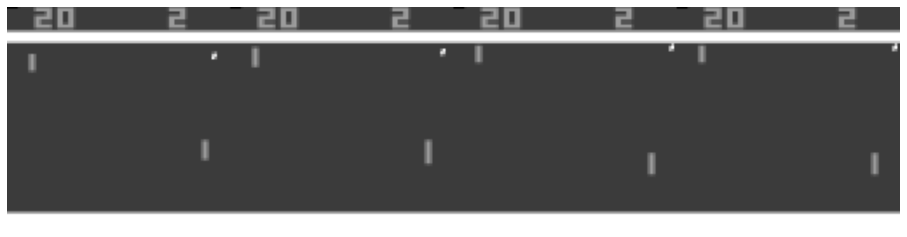

In [20]:
test_env(env, render=False)

###### The actions available

The agent can perform four actions:

In [21]:
meanings = env.unwrapped.get_action_meanings()
explanations = ("Do nothing", "Start the game", "Move right", "Move left")
pd.DataFrame(zip(meanings, explanations), columns=['Name', 'Explanation'])

,Name,Explanation
0,NOOP,Do nothing
1,FIRE,Start the game
2,RIGHT,Move right
3,LEFT,Move left


## References

[[1] OpenAI gym: Atari: Reach high scores in Atari 2600 games.](https://gym.openai.com/envs/#atari)